In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, mean_squared_error, roc_curve, auc, average_precision_score, RocCurveDisplay
import scipy.stats as stats
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif           
import shap

# Load the dataset
df = pd.read_csv('Dataset/diabetes.csv')

## Load dataset information

In [5]:
# Load dataset information
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Count Outcome
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Data type & Null count

In [8]:
# Data type & Null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Check for null values in specific columns
print("Null values in Pregnancies column: {0}".format(df['Pregnancies'].isnull().sum()))
print("Null values in Glucose column: {0}".format(df['Glucose'].isnull().sum()))
print("Null values in BloodPressure column: {0}".format(df['BloodPressure'].isnull().sum()))
print("Null values in SkinThickness column: {0}".format(df['SkinThickness'].isnull().sum()))
print("Null values in Insulin column: {0}".format(df['Insulin'].isnull().sum()))
print("Null values in BMI column: {0}".format(df['BMI'].isnull().sum()))
print("Null values in DiabetesPedigreeFunction column: {0}".format(df['DiabetesPedigreeFunction'].isnull().sum()))
print("Null values in Age column: {0}".format(df['Age'].isnull().sum()))
print("Null values in Outcome column: {0}".format(df['Outcome'].isnull().sum()))

Null values in Pregnancies column: 0
Null values in Glucose column: 0
Null values in BloodPressure column: 0
Null values in SkinThickness column: 0
Null values in Insulin column: 0
Null values in BMI column: 0
Null values in DiabetesPedigreeFunction column: 0
Null values in Age column: 0
Null values in Outcome column: 0


## Check if there have missing value (0) or not

In [11]:
# Check if there have missing value (0) or not
print("No. of rows with Glucose value 0 is: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("No. of rows with SkinThikness 0 is: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(df.loc[df['BMI'] == 0])))
print("No. of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("No. of rows with age 0 is: {0}".format(len(df.loc[df['Age'] == 0])))

No. of rows with Glucose value 0 is: 5
No. of rows with BloodPressure 0 is: 35
No. of rows with SkinThikness 0 is: 227
No. of rows with Insulin 0 is: 374
No. of rows with BMI 0 is: 11
No. of rows with DiabetesPedigreeFunction 0 is: 0
No. of rows with age 0 is: 0


## Fill missing value (0) by its mean

In [13]:
# Fill missing value (0) by its mean
Fill_Mean = SimpleImputer(strategy='mean', missing_values=0)
Fill_Mean = Fill_Mean.fit(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Fill_Mean.transform(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])

## Check if there still have missing value (0) or not

In [15]:
# Check if there still have missing value (0) or not
print("No. of rows with Glucose value 0 is: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("No. of rows with SkinThikness 0 is: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(df.loc[df['BMI'] == 0])))
print("No. of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("No. of rows with age 0 is: {0}".format(len(df.loc[df['Age'] == 0])))

No. of rows with Glucose value 0 is: 0
No. of rows with BloodPressure 0 is: 0
No. of rows with SkinThikness 0 is: 0
No. of rows with Insulin 0 is: 0
No. of rows with BMI 0 is: 0
No. of rows with DiabetesPedigreeFunction 0 is: 0
No. of rows with age 0 is: 0


## Check dataset

In [17]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## Check Normal Distribution (Q-Q plot)

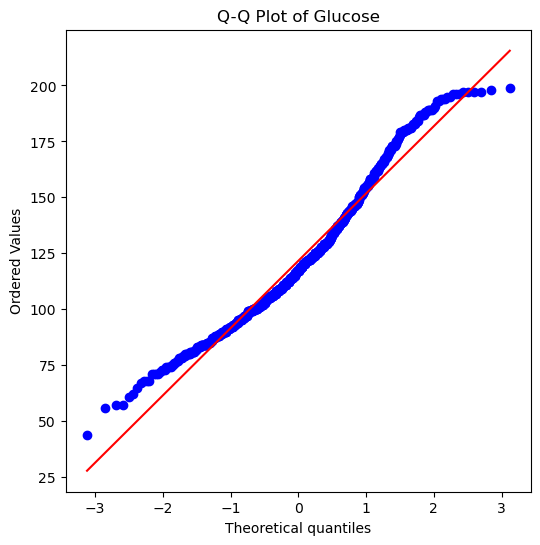

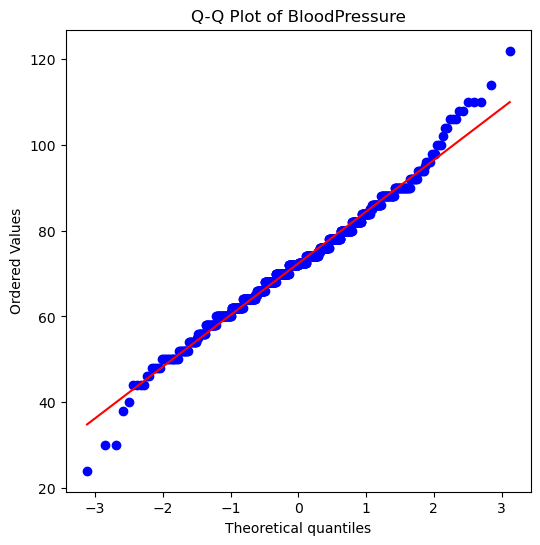

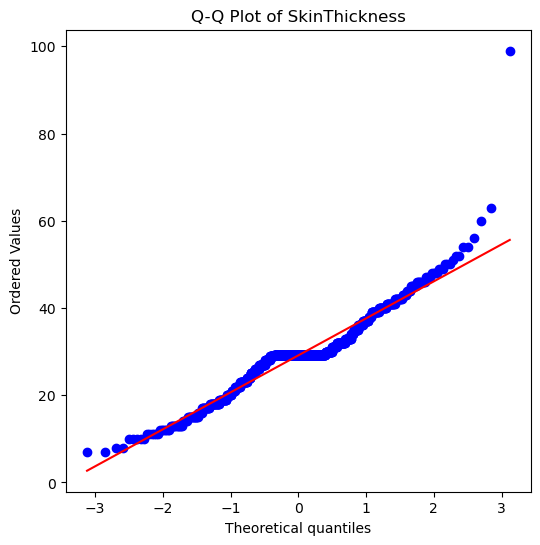

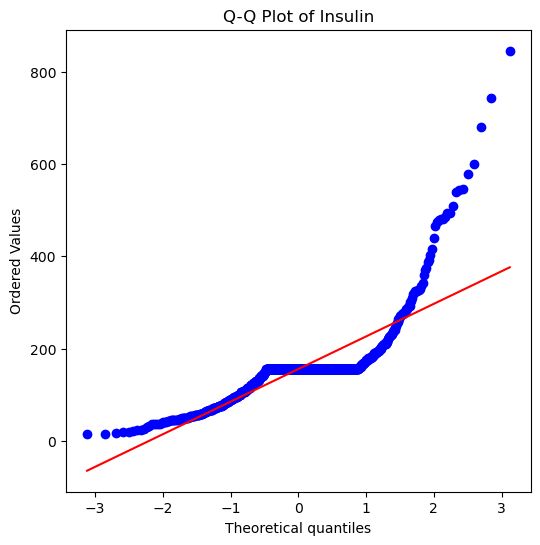

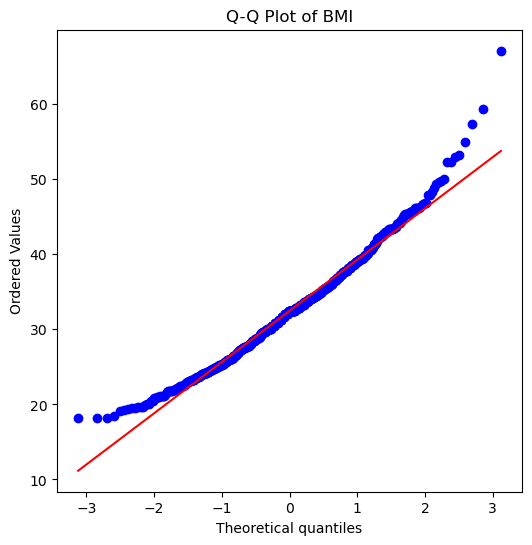

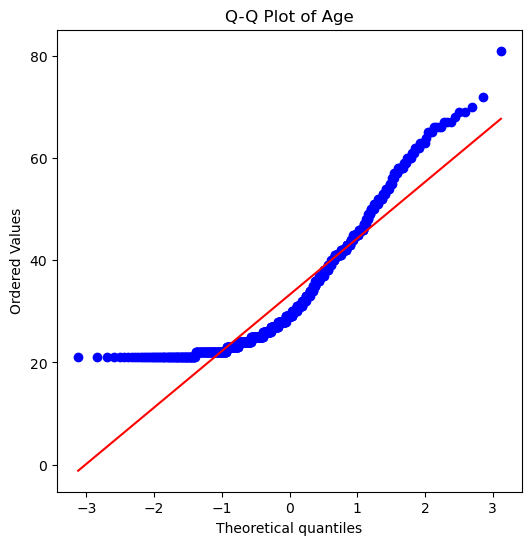

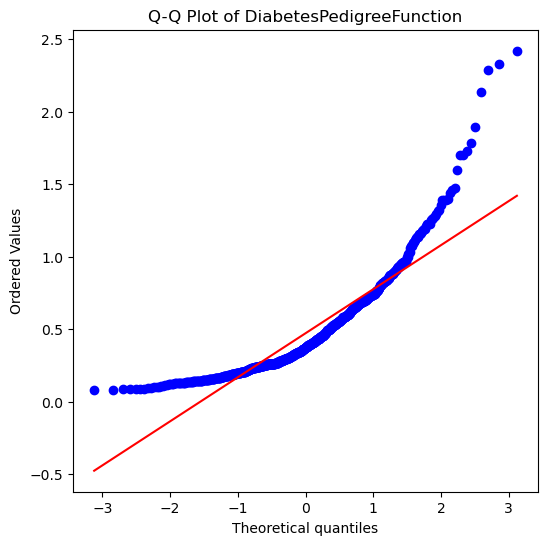

In [20]:
# Create Q-Q plots  ## Insulin, Age, DiabetesPedigreeFunction is not normal
def qq_plot(data, feature):
    plt.figure(figsize=(6, 6))
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')
    plt.show()

# Plot Q-Q graphs for the features
for feature in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age','DiabetesPedigreeFunction']:
    qq_plot(df, feature)
#df['Insulin_exp'] = df.Insulin**(1/1.2)
#qq_plot(df, 'Insulin')


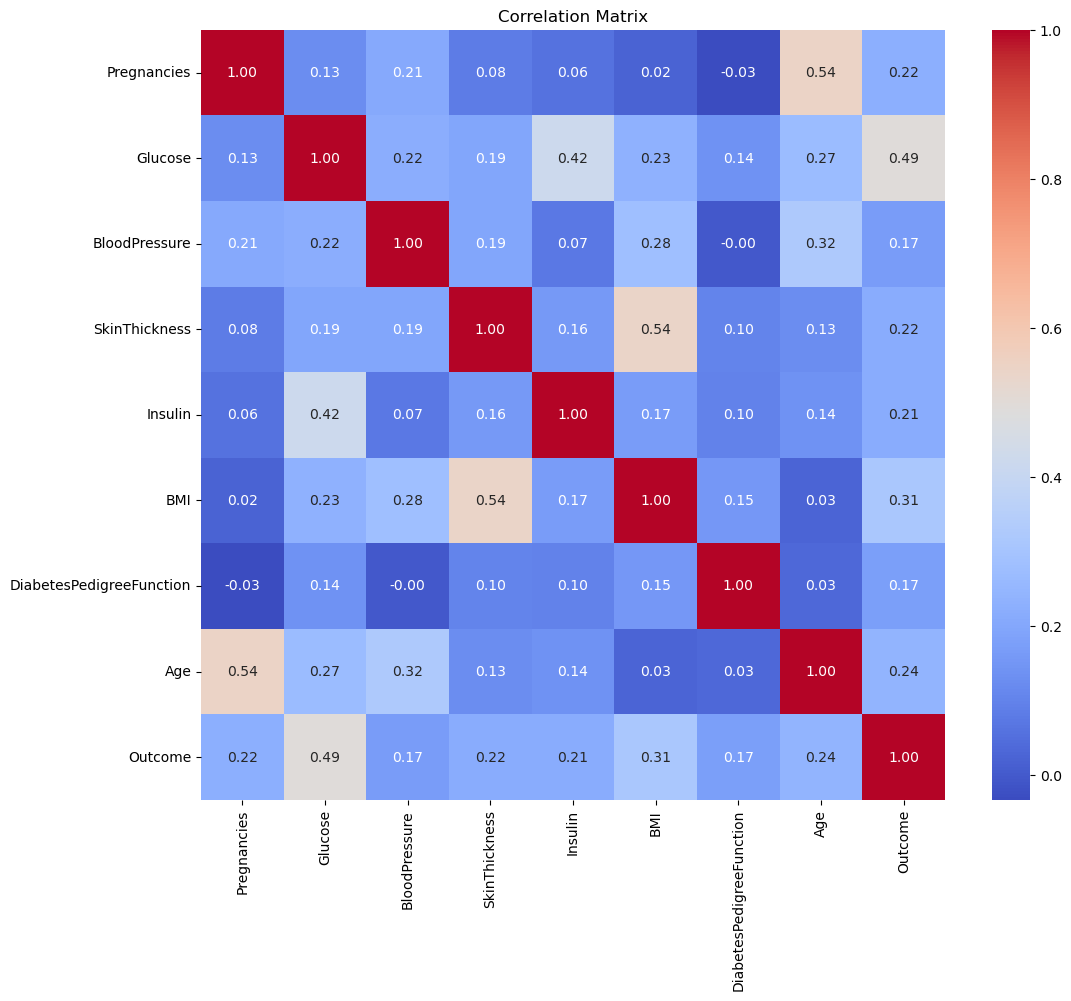

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


# Define Features && last column "Outcome" as Class

In [23]:
# Define Features && last column "Outcome" as Class
X = df.iloc[:, :-1]  # Features = "Pregnancies" , "Glucose", "BloodPressure", "SkinThickness", "Inssulin", "BMI", "DiabetesPedigreeFunction", "Age"
y = df.iloc[:, -1]   # Class = "Outcome"


## Split data (80:20)

In [25]:
# Split data (80 Train: 20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Scaling (Standardization)

In [27]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
#numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
#df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Fit the scaler on the training data
#X_train_scaled = scaler.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)

# Transform the testing data
#X_test_scaled = scaler.transform(X_test)
X_test = scaler.transform(X_test)


## Check Feature importance

[0.04155086 0.11520355 0.         0.02217074 0.07583724 0.0753468
 0.02357779 0.07775627]


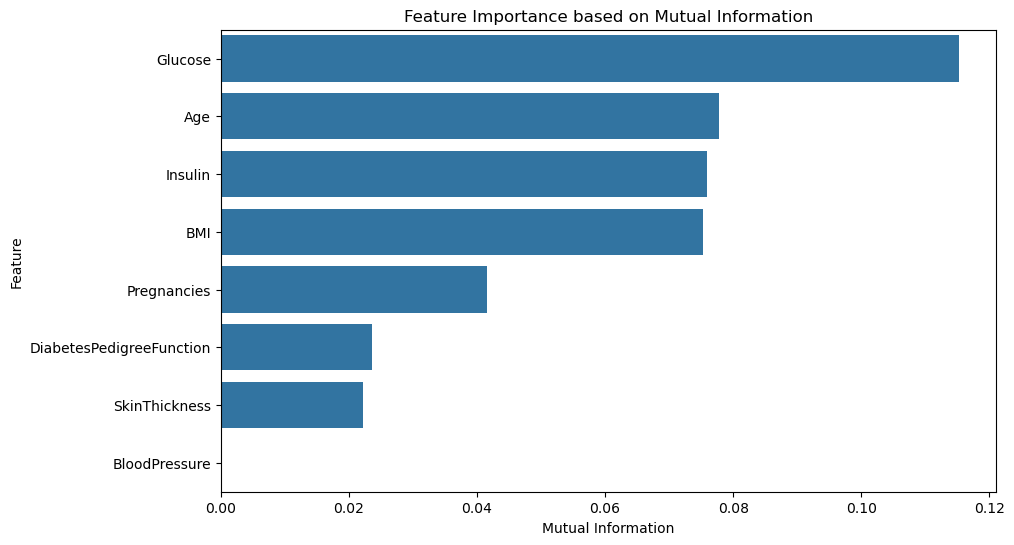

In [29]:
# Check Feature importance
# Calculate mutual information
#mi = mutual_info_classif(X_train, y_train)
mi = mutual_info_classif(X_train, y_train, random_state=42)
#mi = mutual_info_classif(X, y)
#mi = mutual_info_classif(X, y, random_state=42)
print(mi)

# Create a DataFrame for easier visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})

# Sort by importance
mi_df = mi_df.sort_values('Mutual Information', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
plt.title('Feature Importance based on Mutual Information')
plt.show()


## Processing Imbalance data with SMOTE

In [31]:
# Processing Imbalance data with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Check "Outcome" balanced or not

In [33]:
# Check "Outcome" balanced or not
y_train.value_counts()

Outcome
0    401
1    401
Name: count, dtype: int64